In [32]:
import pandas as pd
import jkglab
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
layout = pd.read_csv('/Users/jkgerdts/Mirror/LAB/data/2020 08-12 Transwell/_mat_2_ds.csv')
raw = pd.read_csv('/Users/jkgerdts/Mirror/LAB/data/2020 08-12 Transwell/raw_counts_norm_to_2h.csv')

In [16]:
ds = pd.melt(raw,id_vars='Elapsed',var_name='rcstr',value_name='frx')

In [19]:
ds['w']=[jkglab.rcstr2well(x) for x in ds['rcstr'].values]

In [22]:
dsm = pd.merge(ds,layout,how='left',on='w')

In [24]:
dsm = dsm.set_index('Elapsed')

j 0
j 1
26 0
28 0
30 0
32 0
33 0
34 0


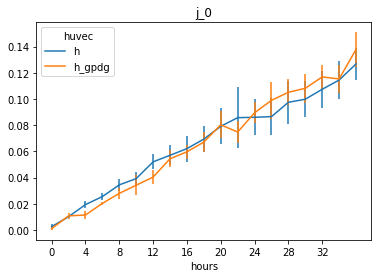

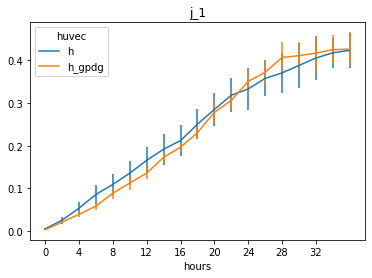

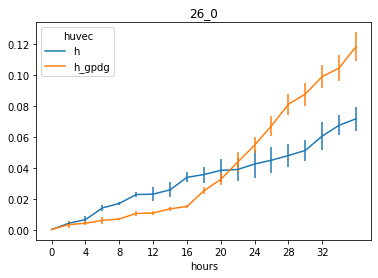

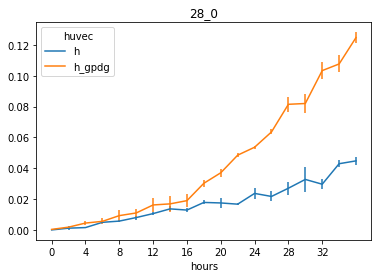

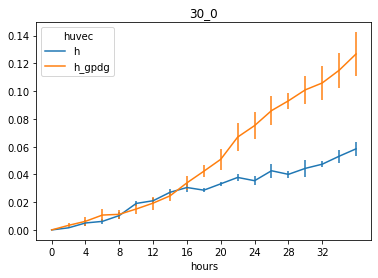

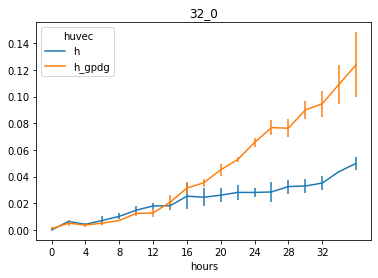

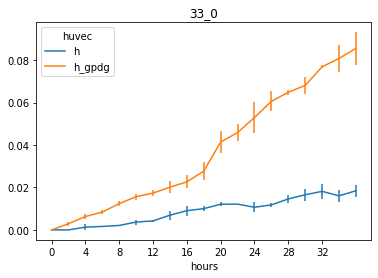

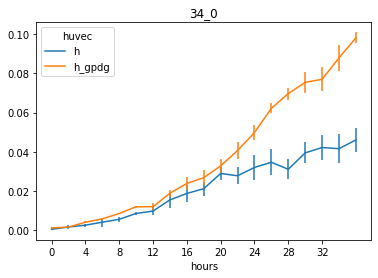

In [37]:
pathname = '/Users/jkgerdts/Mirror/LAB/data/2020 08-12 Transwell/{}.pdf'

for j,tnf in zip(['j','j','26','28','30','32','33','34'],[0,1,0,0,0,0,0,0]):
    dfg = dsm.groupby(['huvec','jurkat','TNFa','Elapsed']).agg({'frx':['mean','sem']})
    ax = dfg.loc[(slice(None),j,tnf),('frx','mean')].unstack(level=-4).plot(yerr=dfg.loc[(slice(None),j,tnf),('frx','sem')].unstack(level=-4))
    ax.set_xlabel('hours')
    ax.set_xticks([x for x in range(0,18,2)])
    ax.set_xticklabels([x for x in range(0,38,4)])
    ax.set_title(j+'_'+str(tnf))
    plt.savefig(pathname.format('figure_'+j+'_'+str(tnf)))